![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [135]:
def present_value(future_cash_flow, discount_rate, number_periods):

    return future_cash_flow / (1 + discount_rate)**number_periods

#2

# The function takes the future cash flow, the discount rate and the number of (time) periods and calculates the present value of an investement.

#3

print(f"The present value of the parameters given in 3 is {present_value(100, 0.03, 10):,.2f}!")

The present value of the parameters given in 3 is 74.41!


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

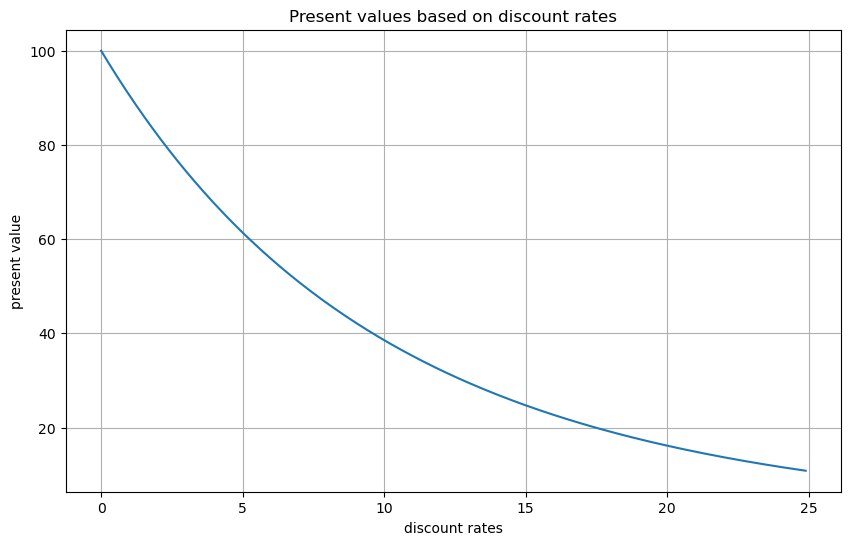

In [136]:
import matplotlib.pyplot as plt
import numpy as np

discount_rates = np.arange(0, 25, 0.1) / 100    # generate discount rates umgerechnet aus % in Dezimaldarstellung
present_values = [present_value(100, rate, 10) for rate in discount_rates]      #calculate present values based of discount rates


plt.figure(figsize=(10, 6))
plt.plot(discount_rates * 100, present_values)  # * 100 to show percentage
plt.title('Present values based on discount rates')
plt.xlabel('discount rates')
plt.ylabel('present value')
plt.grid(True)
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [137]:
year_counter = 1
accumulated_present_value = 0

for future_value in [10,10,110]:                                                    # loop to calculate present value for the first 3 years with given future values held in list of loop.
    accumulated_present_value += present_value(future_value, 0.05, year_counter)    # interest rate is flat at 0.05
    year_counter += 1                                                       

print(f"The present value over the 3 year period is {accumulated_present_value:,.2f}!")


The present value over the 3 year period is 113.62!


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [138]:
# 1
import pandas as pd
import numpy as np

prices =  pd.read_csv("02_python_data.csv")

#2 
column_position_counter =  0
returns = pd.DataFrame()
logreturns = pd.DataFrame()

for asset_name, asset_prices in prices.items():                             # iterate over columns of price table
    
    if asset_name == "Date":
        continue                    # skip date since no asset

    returns_in_list = []
    loop_counter = 0
    previous_price = ""
    for asset_price in asset_prices:                                        # calculate change of asset value to next entry (arithmetic) -> save in list 
        if loop_counter == 0:                                               # set 0 for first value since no previous value
            returns_in_list.append(0)
            previous_price = asset_price
            loop_counter += 1
        else:
            returns_in_list.append((asset_price-previous_price)/previous_price)
            previous_price = asset_price
            loop_counter += 1
    
    returns.insert(column_position_counter, asset_name, returns_in_list, True)


    logreturns_in_list = []
    loop_counter = 0
    previous_price = ""
    for asset_price in asset_prices:                                        # calculate change of asset value to next entry (log) -> save in list 
        if loop_counter == 0:                                                       # set 0 for first value since no previous value
            logreturns_in_list.append(0)
            previous_price = asset_price
            loop_counter += 1
        else:
            logreturns_in_list.append(np.log(asset_price/previous_price))
            previous_price = asset_price
            loop_counter += 1
    
    logreturns.insert(column_position_counter, asset_name, logreturns_in_list, True)

    column_position_counter += 1                                            # increase position counter to iterate over columns

#3

display(returns.head())
display(logreturns.head())


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.011265,-0.010763,-0.022584,-0.015936,-0.014597,-0.005550,-0.072727,-0.011548,-0.011081,-0.020289,...,-0.053923,-0.009410,-0.029693,-0.012416,-0.014898,-0.022180,-0.002379,-0.000681,-0.025899,0.002906
2,0.007203,-0.013056,-0.004864,0.004974,0.023855,0.009302,0.010608,0.020242,0.030139,0.003982,...,0.029779,0.008769,0.048962,0.033527,0.051040,-0.001660,0.008744,0.001136,0.027104,-0.048539
3,-0.004890,-0.018478,0.010649,0.008863,-0.035325,-0.015899,-0.008747,-0.011185,-0.006377,0.030940,...,-0.015858,0.003622,-0.024353,-0.015908,-0.041817,0.004156,-0.024166,-0.016341,-0.015833,0.020305
4,-0.004889,0.018505,0.006910,0.003537,0.061161,-0.064575,-0.021338,-0.009022,-0.018120,0.020777,...,-0.043602,-0.022375,-0.012220,-0.019334,-0.009855,-0.015728,-0.106057,0.016382,-0.006895,-0.036070


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.011329,-0.010821,-0.022843,-0.016065,-0.014705,-0.005566,-0.075508,-0.011615,-0.011143,-0.020497,...,-0.055431,-0.009455,-0.030142,-0.012494,-0.015010,-0.022430,-0.002382,-0.000681,-0.026240,0.002902
2,0.007177,-0.013142,-0.004876,0.004962,0.023575,0.009259,0.010552,0.020040,0.029694,0.003975,...,0.029344,0.008731,0.047801,0.032977,0.049780,-0.001661,0.008706,0.001135,0.026743,-0.049757
3,-0.004902,-0.018651,0.010593,0.008824,-0.035964,-0.016026,-0.008785,-0.011248,-0.006397,0.030471,...,-0.015985,0.003615,-0.024655,-0.016036,-0.042716,0.004148,-0.024463,-0.016476,-0.015960,0.020101
4,-0.004901,0.018336,0.006886,0.003531,0.059363,-0.066754,-0.021569,-0.009063,-0.018286,0.020564,...,-0.044581,-0.022629,-0.012296,-0.019524,-0.009903,-0.015853,-0.112113,0.016249,-0.006919,-0.036736


### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

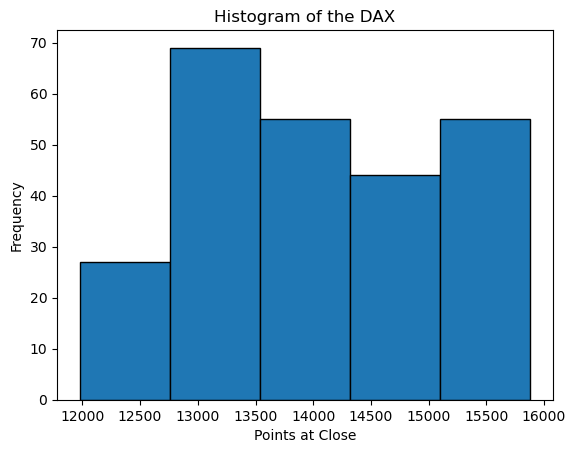

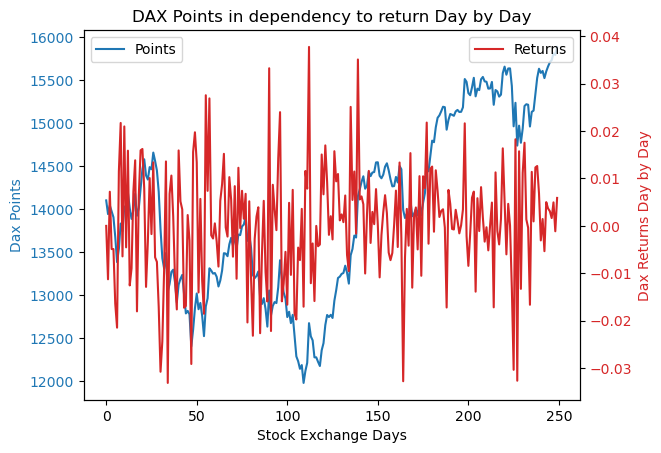

In [139]:
#1 

plt.hist(prices['.GDAXI'], bins=5, edgecolor='black')  
plt.xlabel('Points at Close')
plt.ylabel('Frequency')
plt.title('Histogram of the DAX')
plt.show()

#2 
prices["index"] = prices.index
returns["index"] = returns.index
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Stock Exchange Days')                               # Plotting the prices on the left y-axis
ax1.set_ylabel('Dax Points', color=color)
ax1.plot(prices['index'], prices['.GDAXI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()                                           # Create a second y-axis on the right side


color = 'tab:red'
ax2.set_ylabel('Dax Returns Day by Day', color=color)
ax2.plot(returns['index'], returns['.GDAXI'], color=color)                  # Plotting the returns on the right y-axis
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(['Points'], loc='upper left')
ax2.legend(['Returns'], loc='upper right')

plt.title('DAX Points in dependency to return Day by Day')
plt.show()

### Task:

Which company had the highest average stock return during the time period covered by the data?

In [140]:

prices = prices.drop(columns=['Date', 'index'])
display(prices)
prevous_max_return = 0
company_name = ""
loop_counter = 0

for asset_name, asset_prices in prices.items():  

    if loop_counter == 0:
        loop_counter += 1
        continue
    else:
        if (asset_prices[249]-asset_prices[0])/asset_prices[0] > prevous_max_return:
            prevous_max_return = (asset_prices[249]-asset_prices[0])/asset_prices[0]
            company_name = asset_name
        loop_counter += 1

print(company_name + " had the highest average stock return during the time period covered by the data with => " + str(np.round(prevous_max_return*100,2)) + "%.")

    

,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,14097.88,97.026932,117.78,17.570,105.50,216.20,67.10,148.94,78.51,51.26,...,66.02,55.26,193.65,6.282,214.8,73.94,37.83,44.04,79.54,41.29
1,13939.07,95.982669,115.12,17.290,103.96,215.00,62.22,147.22,77.64,50.22,...,62.46,54.74,187.90,6.204,211.6,72.30,37.74,44.01,77.48,41.41
2,14039.47,94.729554,114.56,17.376,106.44,217.00,62.88,150.20,79.98,50.42,...,64.32,55.22,197.10,6.412,222.4,72.18,38.07,44.06,79.58,39.40
3,13970.82,92.979171,115.78,17.530,102.68,213.55,62.33,148.52,79.47,51.98,...,63.30,55.42,192.30,6.310,213.1,72.48,37.15,43.34,78.32,40.20
4,13902.52,94.699718,116.58,17.592,108.96,199.76,61.00,147.18,78.03,53.06,...,60.54,54.18,189.95,6.188,211.0,71.34,33.21,44.05,77.78,38.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,15703.60,116.620000,144.82,22.400,126.20,218.40,69.34,125.52,102.68,54.50,...,65.70,67.22,229.60,9.720,263.1,69.12,36.07,42.39,52.60,36.62
246,15729.46,115.960000,144.28,22.305,125.90,219.10,69.79,126.08,102.32,54.18,...,66.18,67.94,231.90,9.806,265.4,69.28,36.99,42.40,52.50,35.86
247,15807.50,115.960000,146.16,22.215,126.16,219.10,70.41,127.70,103.68,53.50,...,68.38,69.42,228.90,10.360,267.2,69.96,37.62,42.33,53.46,36.77
248,15789.53,116.360000,147.06,22.345,128.10,216.50,69.25,126.90,103.20,53.68,...,69.10,70.18,234.60,10.000,267.0,70.48,37.31,42.06,52.54,37.14


CBKG.DE had the highest average stock return during the time period covered by the data with => 64.52%.


### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

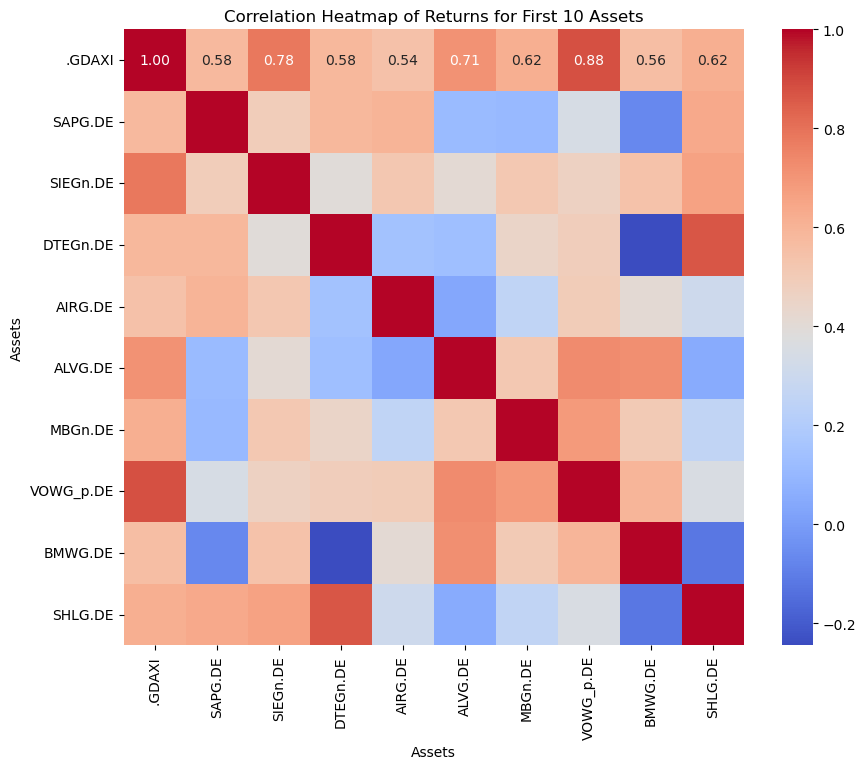

In [141]:
import seaborn as sns


correlation_matrix = returns.iloc[:10, :10].corr()                      # Calculating correlation matrix for the first 10 assets

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")                             # Plotting heatmap
plt.title('Correlation Heatmap of Returns for First 10 Assets')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.show()

### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

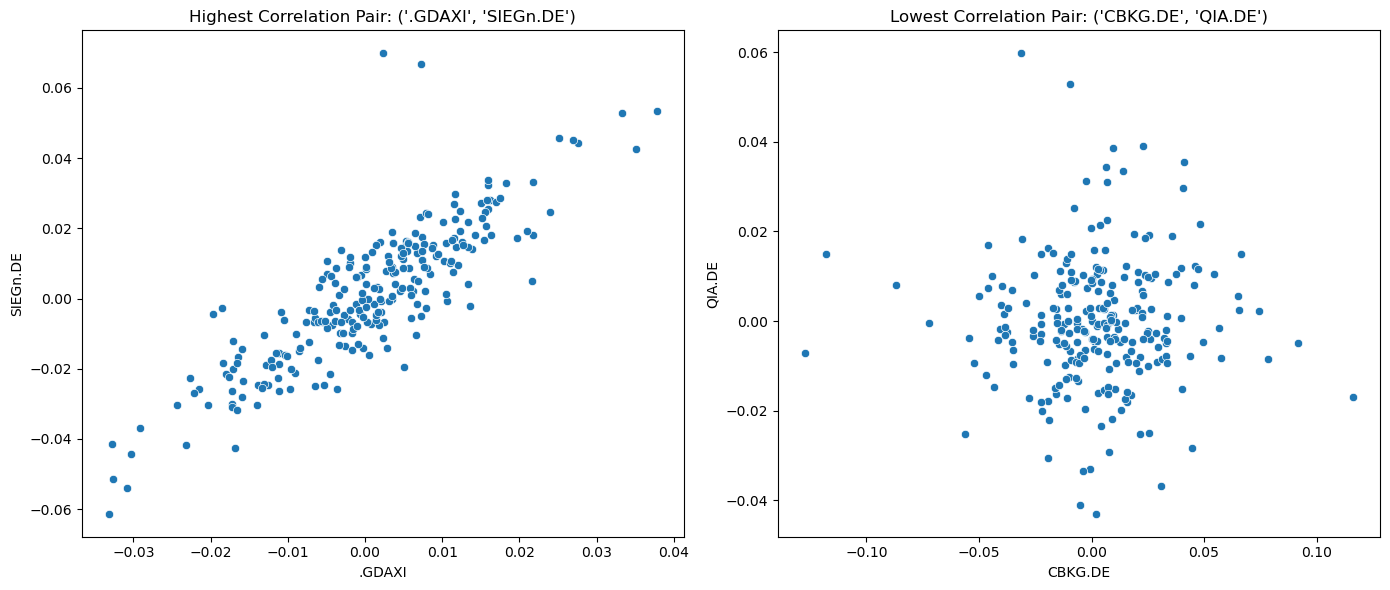

In [142]:

returns = returns.drop(columns=['index'])

correlation_matrix = returns.corr()

highest_corr_pair = correlation_matrix.where(~(correlation_matrix == 1)).stack().idxmax()                   # Exclude 1 values and find pair highest correlation
lowest_corr_pair = correlation_matrix.where(~(correlation_matrix == 1)).stack().idxmin()                    # exclude 1 values and find pair with lowest correlation

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=highest_corr_pair[0], y=highest_corr_pair[1], data=returns, ax=axs[0])
axs[0].set_title(f'Highest Correlation Pair: {highest_corr_pair}')                                          #using sns to plot both corrs

sns.scatterplot(x=lowest_corr_pair[0], y=lowest_corr_pair[1], data=returns, ax=axs[1])
axs[1].set_title(f'Lowest Correlation Pair: {lowest_corr_pair}')

plt.tight_layout()
plt.show()

### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

In [143]:
asset_name_list = []
asset_total_returns = []
asset_volatility = []

for asset_name, asset_prices in prices.items():  
    asset_name_list.append(asset_name)
    asset_total_returns.append(np.round((asset_prices[249]-asset_prices[0])/asset_prices[0]*100, 2))

for asset_name, asset_prices in returns.items():  
    asset_volatility.append(np.round(np.std(asset_prices)*np.sqrt(252), 2))


annulized_asset_results = pd.DataFrame({'asset_name': asset_name_list, 'return': asset_total_returns, 'volatility': asset_volatility})

display(annulized_asset_results)

,asset_name,return,volatility
0,.GDAXI,12.66,0.19
1,SAPG.DE,20.30,0.24
2,SIEGn.DE,24.98,0.31
3,DTEGn.DE,27.80,0.17
4,AIRG.DE,21.59,0.30
5,ALVG.DE,1.30,0.22
6,MBGn.DE,4.58,0.33
7,VOWG_p.DE,-15.01,0.34
8,BMWG.DE,32.59,0.27
9,SHLG.DE,4.72,0.31


### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

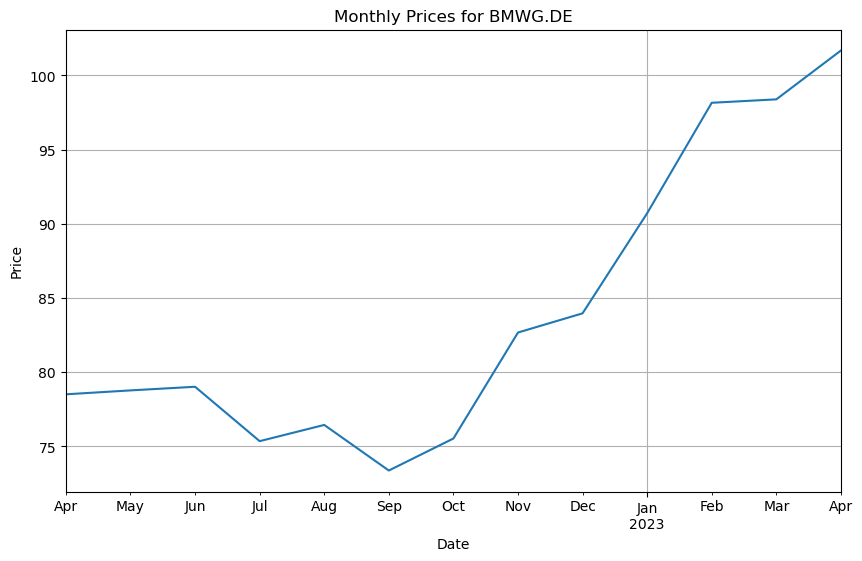

In [144]:
prices =  pd.read_csv("02_python_data.csv")       # and filter for BMW    2022-04-29
prices['Date'] = pd.to_datetime(prices['Date'])             # datetime format for further part

prices.set_index('Date', inplace=True)

monthly_data = prices['BMWG.DE'].resample('M').mean()   # Resample the data to monthly frequency - take mean for months

# Plotting
plt.figure(figsize=(10, 6))
monthly_data.plot(title='Monthly Prices for BMWG.DE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

